# Flight-Price-Prediction
Created a tool that estimates Flight Prices to help users look for best prices when booking flight tickets.
Engineered features from the Departure Time, Date of Journey, to quantify the data and make it more understandable.
Optimized multiple Regression models using GridsearchCV to reach the best model.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("Flight_price_prediction.xlsx")
df.head()

,Airline,Date,Soruce,Destination,Departure_time,Arrival_time,Duration,Total_stop,Price
0,IndiGo,2021-10-05,New Delhi,Mumbai,06:05AM,12:35PM,6h 30m,1 Stop,5496
1,Air Asia,2021-10-05,New Delhi,Mumbai,12:40,08:15AM,7h 35m,1 Stop,5953
2,Air Asia,2021-10-05,New Delhi,Mumbai,11:55,08:15AM,8h 20m,1 Stop,5953
3,Air Asia,2021-10-05,New Delhi,Mumbai,8,04:35AM,8h 35m,1 Stop,5953
4,Air Asia,2021-10-05,New Delhi,Mumbai,18:35,06:20AM,11h 45m,1 Stop,5953


In [3]:
df.shape

(1240, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Airline         1240 non-null   object        
 1   Date            1240 non-null   datetime64[ns]
 2   Soruce          1240 non-null   object        
 3   Destination     1240 non-null   object        
 4   Departure_time  1240 non-null   object        
 5   Arrival_time    1240 non-null   object        
 6   Duration        1240 non-null   object        
 7   Total_stop      1240 non-null   object        
 8        Price      1240 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 87.3+ KB


In [5]:
df.dtypes

Airline                   object
Date              datetime64[ns]
Soruce                    object
Destination               object
Departure_time            object
Arrival_time              object
Duration                  object
Total_stop                object
     Price                 int64
dtype: object

In [6]:
df.isnull().sum()

Airline           0
Date              0
Soruce            0
Destination       0
Departure_time    0
Arrival_time      0
Duration          0
Total_stop        0
     Price        0
dtype: int64

<AxesSubplot:>

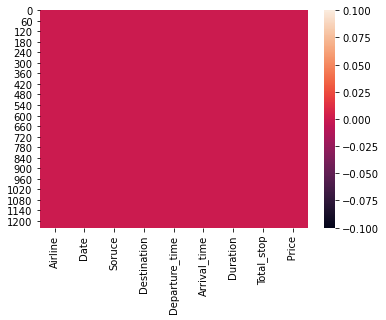

In [7]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Airline', ylabel='count'>

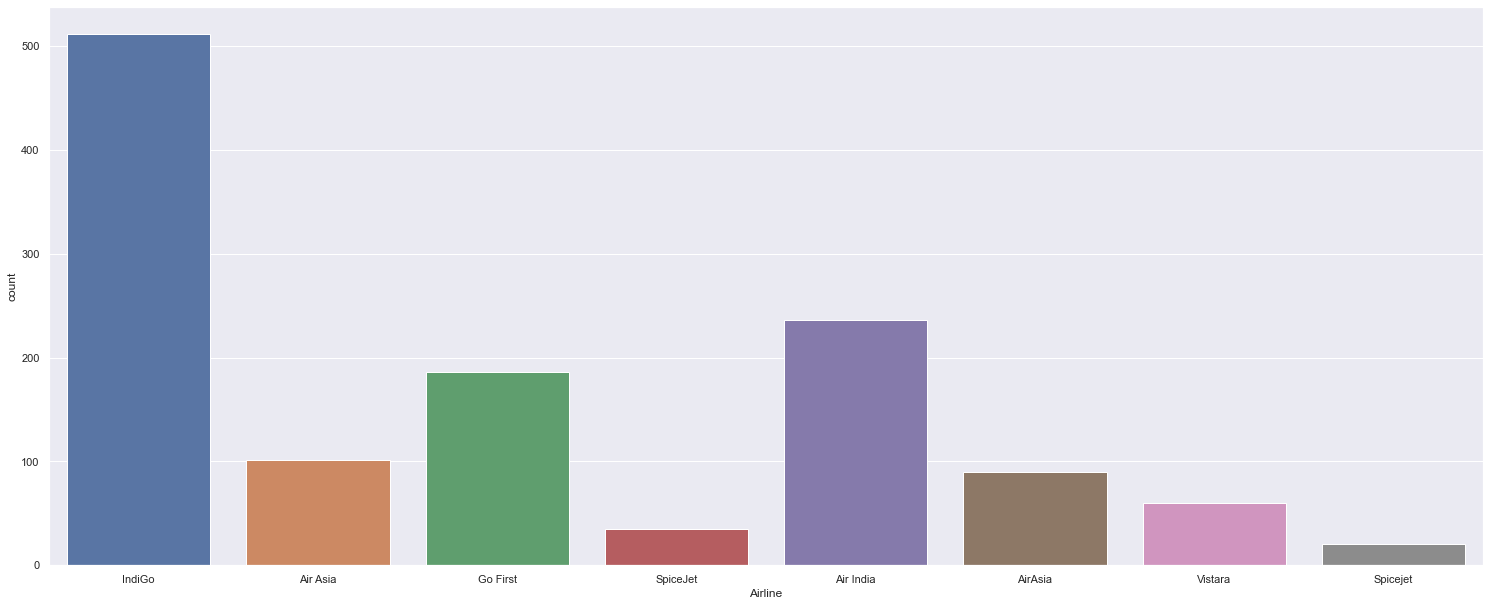

In [8]:
#Analysis of the various airlines 
sns.set(rc={'figure.figsize':(25.7,10.27)})
sns.countplot(df['Airline'])

As shown in the above plot, Indigo Travelled more in numbers in compare to other flights

In [9]:
df['Destination'].value_counts()

Pune         680
Bengaluru    380
Mumbai       180
Name: Destination, dtype: int64

In [10]:
pd.crosstab(df['Soruce'],df['Destination'])

Destination,Bengaluru,Mumbai,Pune
Soruce,,,
Hyderabad,380,0,680
New Delhi,0,180,0


As shows that more number of flight between Hyderabad-Mumbai, this mabe the busiest route

<AxesSubplot:xlabel='Total_stop', ylabel='count'>

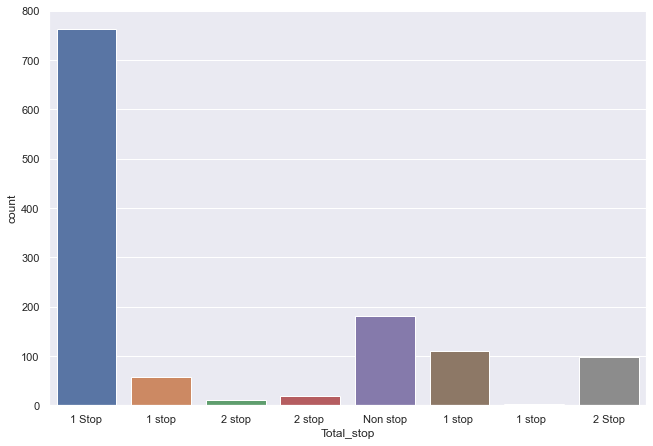

In [11]:
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.countplot(df['Total_stop'])

There are more flights which has more than 1 stop

In [12]:
#stats of airlines with total stops
pd.crosstab(df['Airline'],df['Total_stop'])

Total_stop,1 Stop,1 stop,1 stop,1 stop,2 Stop,2 stop,2 stop,Non stop
Airline,,,,,,,,
Air Asia,92,0,0,0,9,0,0,0
Air India,172,0,0,0,24,0,0,40
AirAsia,0,18,41,1,0,11,19,0
Go First,120,15,23,2,6,0,0,20
IndiGo,348,24,46,0,54,0,0,40
SpiceJet,31,0,0,0,4,0,0,0
Spicejet,0,0,0,0,0,0,0,20
Vistara,0,0,0,0,0,0,0,60


# Feature engineering

In [13]:
df["Date"]=pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [14]:
df.drop(['Date'],axis=1,inplace=True)

In [15]:
df.head()

,Airline,Soruce,Destination,Departure_time,Arrival_time,Duration,Total_stop,Price,Month,Day
0,IndiGo,New Delhi,Mumbai,06:05AM,12:35PM,6h 30m,1 Stop,5496,10,5
1,Air Asia,New Delhi,Mumbai,12:40,08:15AM,7h 35m,1 Stop,5953,10,5
2,Air Asia,New Delhi,Mumbai,11:55,08:15AM,8h 20m,1 Stop,5953,10,5
3,Air Asia,New Delhi,Mumbai,8,04:35AM,8h 35m,1 Stop,5953,10,5
4,Air Asia,New Delhi,Mumbai,18:35,06:20AM,11h 45m,1 Stop,5953,10,5


In [16]:
df["Day"].value_counts()

7    558
6    403
5    279
Name: Day, dtype: int64

In [17]:
# Departure time is when a plane leaves the gate.

#Extracting Hours 
df["Dep_hour"] = pd.to_datetime(df["Departure_time"]).dt.hour

# Extracting Minutes 
df["Dep_min"] = pd.to_datetime(df["Departure_time"]).dt.minute

# Now we can drop Dep_Time as it of no use
df.drop(["Departure_time"], axis = 1, inplace = True)

In [18]:
df.head()

,Airline,Soruce,Destination,Arrival_time,Duration,Total_stop,Price,Month,Day,Dep_hour,Dep_min
0,IndiGo,New Delhi,Mumbai,12:35PM,6h 30m,1 Stop,5496,10,5,6,5
1,Air Asia,New Delhi,Mumbai,08:15AM,7h 35m,1 Stop,5953,10,5,12,40
2,Air Asia,New Delhi,Mumbai,08:15AM,8h 20m,1 Stop,5953,10,5,11,55
3,Air Asia,New Delhi,Mumbai,04:35AM,8h 35m,1 Stop,5953,10,5,0,0
4,Air Asia,New Delhi,Mumbai,06:20AM,11h 45m,1 Stop,5953,10,5,18,35


In [19]:
# Arrival time is when the plane pulls up to the gate 

#Extracting Hours 
df["Arrival_hour"] = pd.to_datetime(df["Arrival_time"]).dt.hour

# Extracting Minutes 
df["Arrival_min"] = pd.to_datetime(df["Arrival_time"]).dt.minute

# Now we can drop Arrival_Time as it of no use
df.drop(["Arrival_time"], axis = 1, inplace = True)

In [20]:
#Duration

df['Duration_hour']=df['Duration'].str.split('h').str[0]

df['Duration_hour'].value_counts()

02     160
1      111
05     100
7       96
6       76
8       70
4       68
5       68
10      62
2       49
14      42
06      40
11      35
9       34
19      27
15      27
16      27
21      27
25      27
11      20
03      20
13      14
04      10
08      10
17      10
16      10
Name: Duration_hour, dtype: int64

In [21]:
def change(data):
    if data=='5m':
        x='0'
    else:
        x=data
    return x

df['Duration_hour']=df['Duration_hour'].apply(lambda x:change(x))

In [22]:
df['Duration']=df['Duration'].str.split(' ').str[1]

df['Duration_minute']=df['Duration'].str.split('m').str[0]

df['Duration_minute'].fillna('0',inplace=True)

df.drop(['Duration'],axis=1,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1240 non-null   object
 1   Soruce           1240 non-null   object
 2   Destination      1240 non-null   object
 3   Total_stop       1240 non-null   object
 4        Price       1240 non-null   int64 
 5   Month            1240 non-null   int64 
 6   Day              1240 non-null   int64 
 7   Dep_hour         1240 non-null   int64 
 8   Dep_min          1240 non-null   int64 
 9   Arrival_hour     1240 non-null   int64 
 10  Arrival_min      1240 non-null   int64 
 11  Duration_hour    1240 non-null   object
 12  Duration_minute  1240 non-null   object
dtypes: int64(7), object(6)
memory usage: 126.1+ KB


In [23]:
df['Total_stop'].value_counts()

1 Stop      763
Non stop    180
1 stop      110
2 Stop       97
1 stop       57
2 stop       19
2 stop       11
1 stop        3
Name: Total_stop, dtype: int64

In [24]:
df['Total_stop'].replace(['Non stop'],['0 stop'],inplace=True)
df['Total_stop'].replace(['1 Stop'],['1 stop'],inplace=True)
df['Total_stop'].replace(['2 Stop'],['2 stop'],inplace=True)
df['Total_stop'].value_counts()

1 stop      820
0 stop      180
1 stop      110
2 stop      108
2 stop       19
1 stop        3
Name: Total_stop, dtype: int64

In [25]:
df['stop']=df['Total_stop'].str.split(' ').str[0]

In [26]:
df['stop'].fillna('0',inplace=True)

In [27]:
df['stop']=df['stop'].astype(int)

In [28]:
df.drop(['Total_stop'],axis=1,inplace=True)

In [29]:
df.head()

,Airline,Soruce,Destination,Price,Month,Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minute,stop
0,IndiGo,New Delhi,Mumbai,5496,10,5,6,5,12,35,6,30,1
1,Air Asia,New Delhi,Mumbai,5953,10,5,12,40,8,15,7,35,1
2,Air Asia,New Delhi,Mumbai,5953,10,5,11,55,8,15,8,20,1
3,Air Asia,New Delhi,Mumbai,5953,10,5,0,0,4,35,8,35,1
4,Air Asia,New Delhi,Mumbai,5953,10,5,18,35,6,20,11,45,1


In [30]:
df.stop.value_counts()

1    933
0    180
2    127
Name: stop, dtype: int64

In [31]:
import re
df.replace({'Duration_minute':{'[A-za-z]'}},'',regex = True,inplace = True)

In [32]:
df['Duration_minute'] = pd.to_numeric(df['Duration_minute'])
df['Duration_hour'] = pd.to_numeric(df['Duration_hour'])

In [33]:
df.isnull().sum()

Airline              0
Soruce               0
Destination          0
     Price           0
Month                0
Day                  0
Dep_hour             0
Dep_min              0
Arrival_hour         0
Arrival_min          0
Duration_hour        0
Duration_minute    380
stop                 0
dtype: int64

In [34]:
df.Duration_minute.head(500)

0      30.0
1      35.0
2      20.0
3      35.0
4      45.0
       ... 
495     NaN
496     NaN
497     NaN
498     NaN
499     NaN
Name: Duration_minute, Length: 500, dtype: float64

In [35]:
new_df=df.interpolate()
new_df

,Airline,Soruce,Destination,Price,Month,Day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minute,stop
0,IndiGo,New Delhi,Mumbai,5496,10,5,6,5,12,35,6,30.0,1
1,Air Asia,New Delhi,Mumbai,5953,10,5,12,40,8,15,7,35.0,1
2,Air Asia,New Delhi,Mumbai,5953,10,5,11,55,8,15,8,20.0,1
3,Air Asia,New Delhi,Mumbai,5953,10,5,0,0,4,35,8,35.0,1
4,Air Asia,New Delhi,Mumbai,5953,10,5,18,35,6,20,11,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,Air Asia,Hyderabad,Pune,5289,10,7,23,50,2,15,14,25.0,1
1236,SpiceJet,Hyderabad,Pune,5292,10,7,6,55,8,15,1,20.0,1
1237,Go First,Hyderabad,Pune,5292,10,7,0,0,4,10,10,10.0,1
1238,IndiGo,Hyderabad,Pune,5293,10,7,11,55,1,5,1,10.0,1


In [36]:
new_df.Duration_minute.head(500)

0      30.000000
1      35.000000
2      20.000000
3      35.000000
4      45.000000
         ...    
495    28.412073
496    28.359580
497    28.307087
498    28.254593
499    28.202100
Name: Duration_minute, Length: 500, dtype: float64

# LabelEncoder

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df['Soruce']=le.fit_transform(new_df['Soruce'])
new_df['Airline']=le.fit_transform(new_df['Airline'])
new_df['Destination']=le.fit_transform(new_df['Destination'])

In [38]:
new_df.dtypes

Airline              int32
Soruce               int32
Destination          int32
     Price           int64
Month                int64
Day                  int64
Dep_hour             int64
Dep_min              int64
Arrival_hour         int64
Arrival_min          int64
Duration_hour        int64
Duration_minute    float64
stop                 int32
dtype: object

<AxesSubplot:>

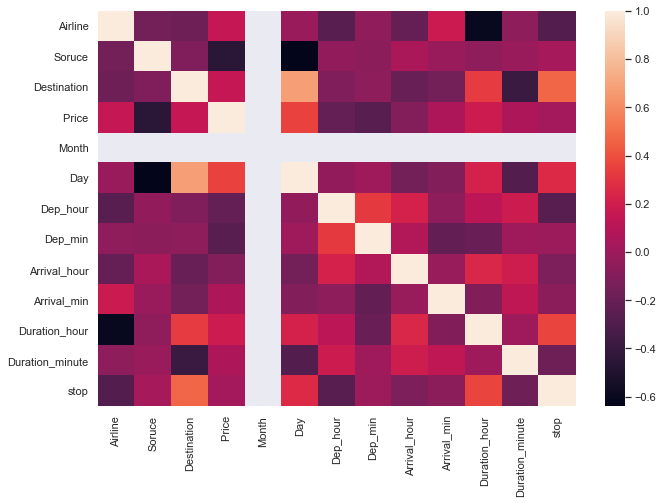

In [39]:
sns.heatmap(new_df.corr())

# OUTLIERS

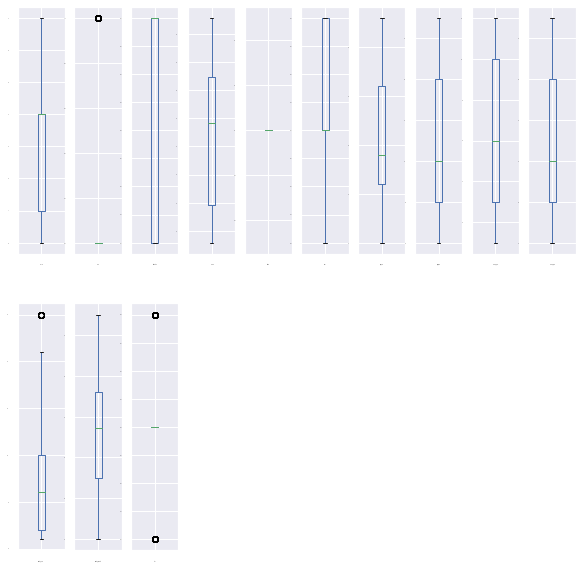

In [40]:
new_df.plot(kind="box",subplots=True,layout=(2,10),sharex=False,legend=False,fontsize=1,figsize=(10,10))
plt.show()

# Skewness

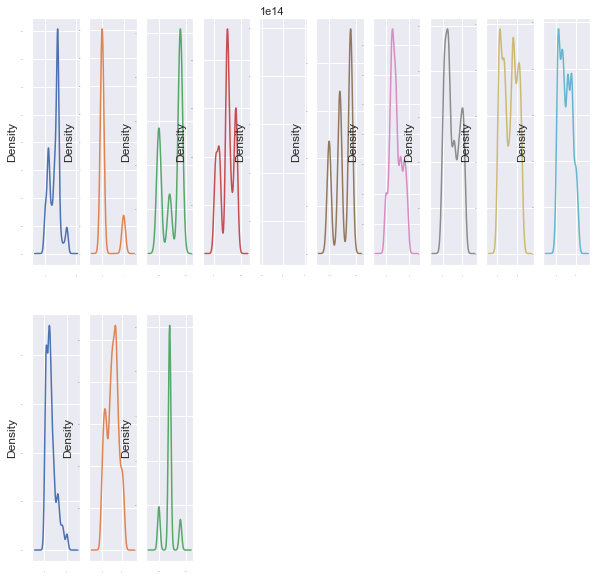

In [41]:
new_df.plot(kind="density",subplots=True,layout=(2,10),sharex=False,legend=False,fontsize=1,figsize=(10,10))
plt.show()

In [43]:
x=new_df.drop("     Price",axis=1)
y=new_df["     Price"]

# Data Cleansing

In [44]:
Q1=new_df.quantile(0.25)
Q3=new_df.quantile(0.75)
IQR=Q3-Q1
#Removing Outliers using IQR method
df1=new_df[~((new_df < (Q1-1.5*IQR)) | (new_df> (Q3+1.5*IQR))).any(axis=1)]

In [45]:
df1.shape

(729, 13)

In [46]:
loss_percentage=(1240-729)/1240*100
print(loss_percentage)

41.20967741935484


As the data loss is so high, so i am not removing the outliers as it is very low. Error can be neglible

In [47]:
df1.skew()

Airline           -0.731625
Soruce             0.000000
Destination       -1.264487
     Price        -0.619239
Month              0.000000
Day               -1.087098
Dep_hour           0.567251
Dep_min            0.219387
Arrival_hour       0.262063
Arrival_min        0.050747
Duration_hour      1.004464
Duration_minute    0.180186
stop               0.000000
dtype: float64

In [48]:
from sklearn.preprocessing import power_transform
df1=power_transform(x)
df1=pd.DataFrame(df1,columns=x.columns)

In [49]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

# Random State

In [50]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
maxAucc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    le=LinearRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAucc:
        maxAucc=acc
        maxRS=i
print("Best Accuracy is ",maxAucc,"on random_state",maxRS)

Best Accuracy is  0.4561675688346486 on random_state 63


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [52]:
LR=LinearRegression()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=45)
ABR=AdaBoostRegressor(random_state=45)
RFR=RandomForestRegressor(random_state=45)
GBR=GradientBoostingRegressor(random_state=45)

In [53]:
models=[]
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [54]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression()
R2_score =  0.3106114265865493
Mean_Squared_Error = 1171744.8237531374
Cross_Val_Score =  -23372.850170740472


********************************* DecisionTreeRegressor *********************************

 DecisionTreeRegressor(random_state=45)
R2_score =  1.0
Mean_Squared_Error = 0.0
Cross_Val_Score =  1.0


********************************* KNeighborsRegressor *********************************

 KNeighborsRegressor()
R2_score =  0.9979140835472301
Mean_Squared_Error = 3545.4051612903218
Cross_Val_Score =  0.9660088313228974


********************************* AdaBoostRegressor *********************************

 AdaBoostRegressor(random_state=45)
R2_score =  0.9488392285421207
Mean_Squared_Error = 86957.30020322636
Cross_Val_Score =  -1581.7981086433867


********************************* RandomForestRegressor *********************************

 RandomForestRegressor(random_state=4

In [55]:
import joblib
joblib.dump(DTR,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']